In [3]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot') # Look Pretty
from pandas.tools.plotting import parallel_coordinates,andrews_curves
%matplotlib notebook
import assignment2_helper as helper

In [17]:
# Kidney data 
df = pd.read_csv('Datasets/kidney_disease.csv')
df.dropna(inplace= True)

In [18]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [19]:
# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [20]:
labels[:10]

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']

In [23]:
df = df[['bgr','wc','rc']]
df.shape
df.bgr = pd.to_numeric(df.bgr , errors='coerce')
df.wc = pd.to_numeric(df.wc , errors='coerce')
df.rc = pd.to_numeric(df.rc , errors='coerce')

In [22]:
df.describe()

,bgr,wc,rc
count,158.000000,158.000000,158.000000
mean,131.341772,8475.949367,4.891772
std,64.939832,3126.880181,1.019364
min,70.000000,3800.000000,2.100000
25%,97.000000,6525.000000,4.500000
50%,115.500000,7800.000000,4.950000
75%,131.750000,9775.000000,5.600000
max,490.000000,26400.000000,8.000000


<IPython.core.display.Javascript object>


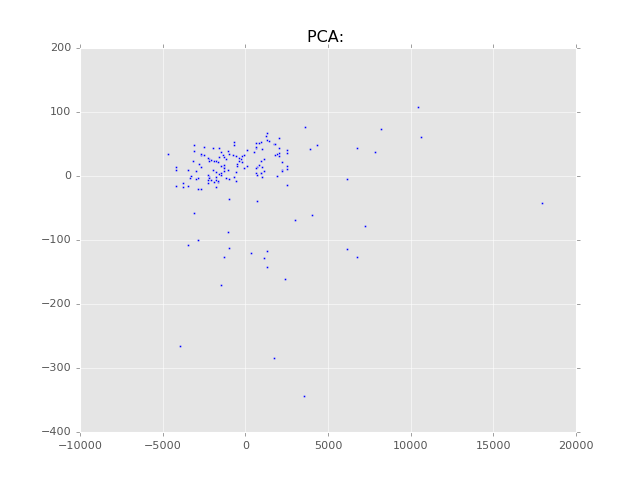

In [10]:
pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('PCA: ')
ax.scatter(T[:,0], T[:,1], c='blue', marker='.', alpha=1)

<IPython.core.display.Javascript object>


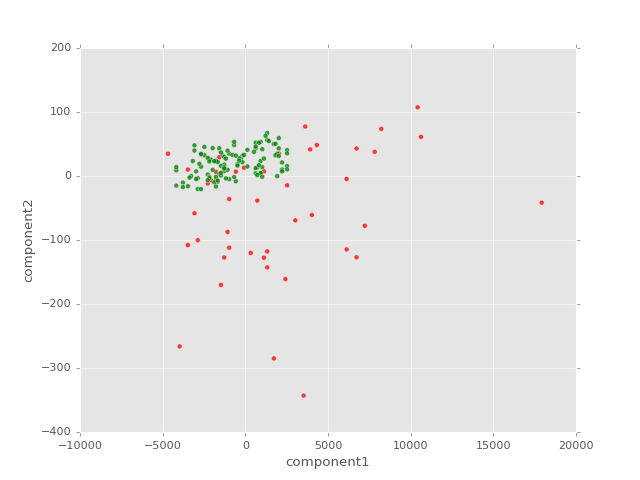

In [13]:
scaleFeatures = False
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

In [24]:
scaleFeatures = True
df=helper.scaleFeatures(df)

New Variances:
 bgr    1.006369
wc     1.006369
rc     1.006369
dtype: float64
New Describe:
                 bgr            wc            rc
count  1.580000e+02  1.580000e+02  1.580000e+02
mean  -9.755075e-17  9.345548e-17  1.068063e-16
std    1.003180e+00  1.003180e+00  1.003180e+00
min   -9.475974e-01 -1.500159e+00 -2.747446e+00
25%   -5.305059e-01 -6.259123e-01 -3.855519e-01
50%   -2.447210e-01 -2.168611e-01  5.730335e-02
75%    6.306235e-03  4.167672e-01  6.969831e-01
max    5.540492e+00  5.750474e+00  3.058878e+00


In [25]:
df.describe()

,bgr,wc,rc
count,1.580000e+02,1.580000e+02,1.580000e+02
mean,-9.755075e-17,9.345548e-17,1.068063e-16
std,1.003180e+00,1.003180e+00,1.003180e+00
min,-9.475974e-01,-1.500159e+00,-2.747446e+00
25%,-5.305059e-01,-6.259123e-01,-3.855519e-01
50%,-2.447210e-01,-2.168611e-01,5.730335e-02
75%,6.306235e-03,4.167672e-01,6.969831e-01
max,5.540492e+00,5.750474e+00,3.058878e+00


In [26]:
pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df)

Features by importance:
 [(3.9998071556884853, 'wc'), (3.2588876641210898, 'bgr'), (3.0097527529983648, 'rc')]


<IPython.core.display.Javascript object>


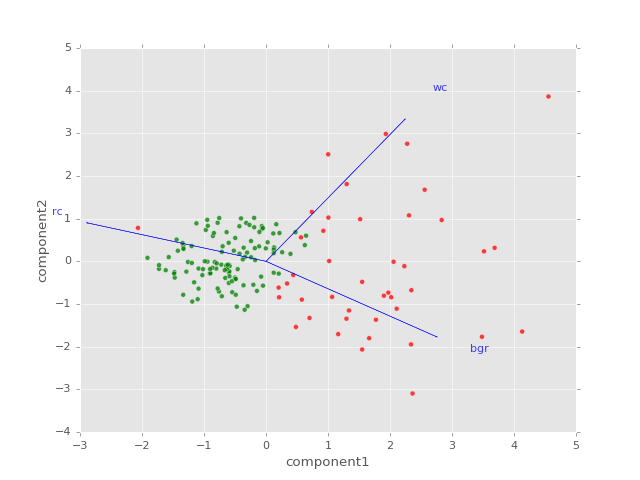

In [27]:
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()